In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'C:\\Users\\bayui'

In [3]:
os.chdir('E:')

In [4]:
os.getcwd()

'E:\\'

In [5]:
data_path = 'E:/Image/'

In [6]:
class_data = os.listdir(data_path)
class_data

['batagor', 'bukan batagor']

In [7]:
def load_image_and_label(class_data):
    image=[]
    label=[]
    for index, category in enumerate(class_data):
        for image_name in os.listdir(data_path+"/"+category):
            img = cv2.imread(data_path+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            resize_img = img_array.resize((227, 227))
            
            image.append(np.array(resize_img))
            
            label.append(index)
    return image, label

images_final, label_final = load_image_and_label(class_data)
print("No. of image = ", len(images_final), "\nNo.of label = ", len(label_final))
print(type(images_final), type(label_final))
        

No. of image =  606 
No.of label =  606
<class 'list'> <class 'list'>


In [8]:
images_final = np.array(images_final)
label_final = np.array(label_final)

print("Images shape = ", images_final.shape,"\nLabels shape = ", label_final.shape)
print(type(images_final), type(label_final))

Images shape =  (606, 227, 227, 3) 
Labels shape =  (606,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
random_seed = 42

n = np.arange(images_final.shape[0])
print("Before shuffling = ", n)

np.random.seed(random_seed)
np.random.shuffle(n)
print("\nAfter shuffling = ", n)

Before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 24

In [10]:
images_final = images_final[n]
label_final = label_final[n]

print("Images after shuffling = ", images_final.shape, "\nLabel after shuffling = ", label_final.shape)

Images after shuffling =  (606, 227, 227, 3) 
Label after shuffling =  (606,)


In [11]:
images_final = images_final.astype(np.float32)
label_final = label_final.astype(np.int32)
images_final = images_final/255

print("Images after normalization = ", images_final.shape)

Images after normalization =  (606, 227, 227, 3)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(images_final, label_final, test_size = 0.2, random_state=random_seed)

print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("\nx_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (484, 227, 227, 3)
y_train shape =  (484,)

x_test shape =  (122, 227, 227, 3)
y_test shape =  (122,)


In [26]:
import tensorflow as tf

In [27]:
from tensorflow.keras import layers, models

In [30]:
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

In [29]:
def create_simple_cnn(input_shape, num_classes):
    model = models.Sequential()
    
    # Layer konvolusi pertama dengan 32 filter ukuran 3x3
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    # Layer pooling pertama
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Layer konvolusi kedua dengan 64 filter ukuran 3x3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # Layer pooling kedua
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Layer konvolusi ketiga dengan 64 filter ukuran 3x3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten hasil dari layer konvolusi sebelumnya
    model.add(layers.Flatten())
    
    # Layer fully connected pertama dengan 64 unit
    model.add(layers.Dense(64, activation='relu'))
    # Output layer dengan jumlah neuron sesuai dengan jumlah kelas
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Contoh penggunaan
input_shape = (227, 227, 3)  # Misalnya untuk data gambar berukuran 28x28 dengan 1 channel (misalnya grayscale)
num_classes = 2  # Misalnya untuk klasifikasi 10 kelas (misalnya MNIST)
model = create_simple_cnn(input_shape, num_classes)

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 53, 53, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 179776)           

In [23]:
epochs = 25
batch_size = 16

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
history = model.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(x_test, y_test))


Epoch 1/25
31/31 [==============================] - 89s 3s/step - loss: 0.3227 - accuracy: 0.9463 - val_loss: 0.0176 - val_accuracy: 0.9918
Epoch 2/25
31/31 [==============================] - 81s 3s/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 6.3436e-04 - val_accuracy: 1.0000
Epoch 3/25
31/31 [==============================] - 80s 3s/step - loss: 2.2645e-04 - accuracy: 1.0000 - val_loss: 3.6608e-04 - val_accuracy: 1.0000
Epoch 4/25
31/31 [==============================] - 81s 3s/step - loss: 1.2677e-04 - accuracy: 1.0000 - val_loss: 7.2326e-04 - val_accuracy: 1.0000
Epoch 5/25
31/31 [==============================] - 80s 3s/step - loss: 7.6743e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/25
31/31 [==============================] - 80s 3s/step - loss: 5.5699e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/25
31/31 [==============================] - 82s 3s/step - loss: 4.2778e-05 - accuracy: 1.0000 - val_loss: 0.0018 - val_accur

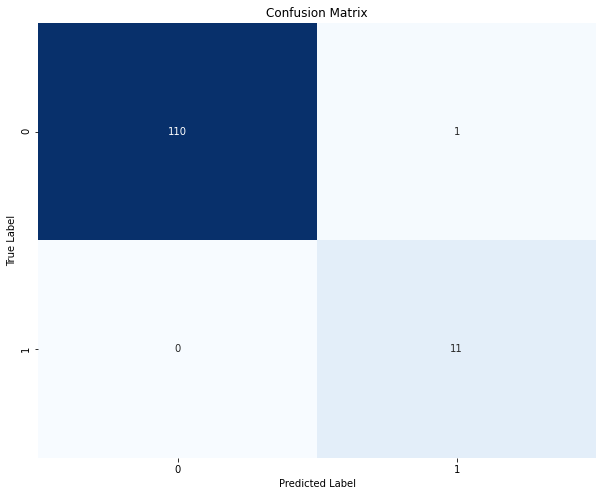

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi label kelas untuk data uji
predicted_labels = np.argmax(model.predict(x_test), axis=-1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()